implement logistic regression model to classify a dataset (predict if aa customer will make a purchase)

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

In [3]:
#Generate Synthetic Dataset
np.random.seed(42)
n_samples = 200
X = np.random.rand(n_samples, 2) * 10
y = (X[:, 0] * 1.5 + X[:, 1] > 15).astype(int)

In [4]:
df = pd.DataFrame(X, columns=['Age', 'Salary'])
df['Purchase'] = y

In [7]:
# SPlit 
X_train, X_test, y_train, y_test = train_test_split(df[['Age', 'Salary']], df['Purchase'], test_size=0.2, random_state=42)

In [8]:
# Tran logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [9]:
# Make preditcion
y_pred = model.predict(X_test)

In [12]:
# Evaluate
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"precision: {precision_score(y_test, y_pred)}")
print(f"recall: {recall_score(y_test, y_pred)}")
print(f"f1: {f1_score(y_test, y_pred)}")
print(f"classification: {classification_report(y_test, y_pred)}")

Accuracy: 1.0
precision: 1.0
recall: 1.0
f1: 1.0
classification:               precision    recall  f1-score   support

           0       1.00      1.00      1.00        26
           1       1.00      1.00      1.00        14

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40



In [13]:
import matplotlib.pyplot as plt

In [16]:
# Plot decision boundary
# x_min, x_max = X['Age'].min() - 1, X['Age'].max() + 1
# y_min, y_max = X['Salary'].min() - 1, X['Salary'].max() + 1
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1  # Kolom pertama (Age)
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1  # Kolom kedua (Salary)
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

In [18]:
# Predict probabilities for grid points
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

c:\Users\legion\anaconda3\envs\rapids-env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


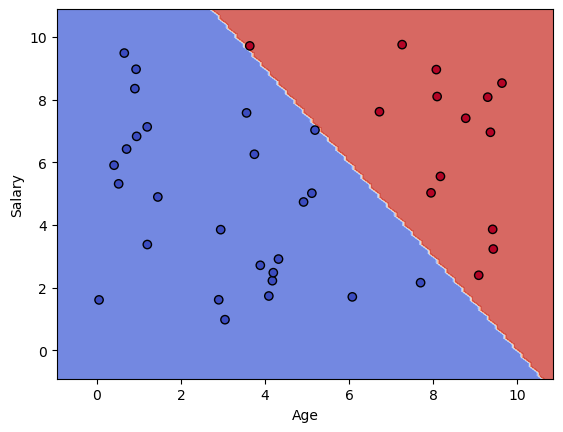

In [19]:
# Plot
plt.contourf(xx, yy, Z, alpha=0.8, cmap="coolwarm")
plt.scatter(X_test['Age'], X_test['Salary'], c=y_test, edgecolors="k", cmap="coolwarm")
plt.xlabel("Age")
plt.ylabel("Salary")
plt.show()